# Classification for customer will subscribe new scheme

In [286]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [287]:
df = pd.read_csv('F:/bank (1) 2.csv')

In [288]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30.0,management,married,primary,no,1476,yes,yes,NaN,3,jun,199,4,-1,0,NaN,no
4,NaN,blue-collar,married,secondary,no,0,yes,no,NaN,5,may,226,1,-1,0,NaN,no


# Shows the dimesnsion , informations of data frame

In [289]:
df.shape

(4521, 17)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4516 non-null float64
job          4483 non-null object
marital      4521 non-null object
education    4334 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      3230 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     816 non-null object
y            4521 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 600.5+ KB


In [291]:
#it gives statastics description
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4516.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.159433,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.572297,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [292]:
import numpy

In [293]:
df.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

# check for null values

In [294]:
df.isnull().sum()

age             5
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1291
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

# filling null values for categorical data with mode

In [295]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['contact'].fillna(df['contact'].mode()[0],inplace=True)

In [296]:
df.isnull().sum()

age             5
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

# charts

 # customer's proffesion who appiled for new scheme

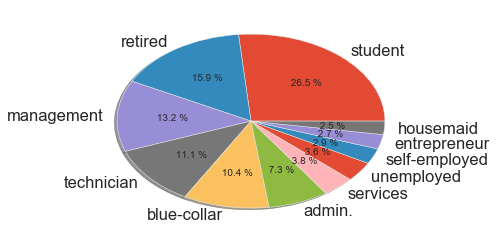

In [297]:
dfy=df[df['y']=="yes"]
plt.pie(dfy['job'].value_counts(),labels=dfy['job'].unique(),autopct='% 1.1f %%', shadow = True) 
plt.show() 


# How many client will subscribe to new scheme

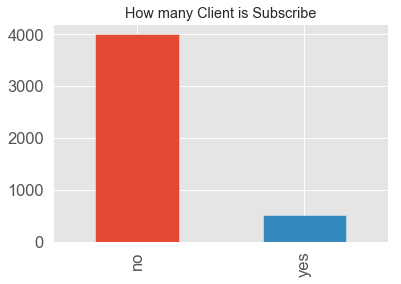

In [298]:
df['y'].value_counts().plot(kind='bar',title='How many Client is Subscribe')


# histogram for balance of the clients

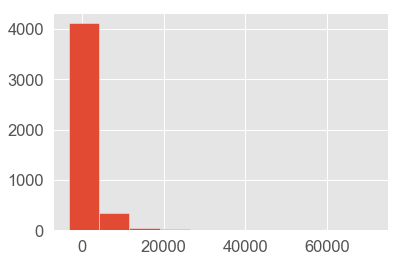

In [332]:
df['balance'].hist()

# age wise balance of customer

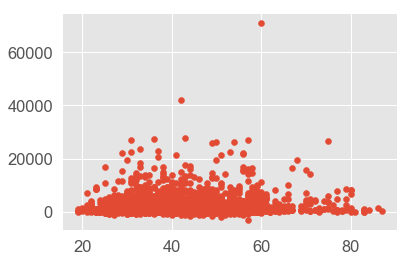

maximum balance e is 71188


In [334]:
plt.scatter(df['age'], df['balance']) 
plt.show() 
print("maximum balance e is",max(df['balance']))


# The customer who appiled for scheme and its marital status

In [301]:
p=pd.crosstab(df['marital'],df['y'])
p


y,no,yes
marital,,
divorced,451,77
married,2520,277
single,1029,167


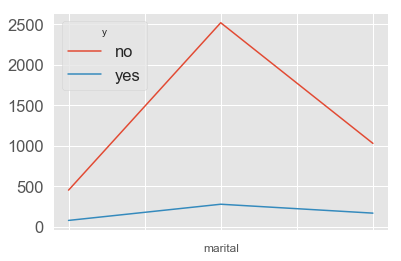

In [302]:
#plot pivot table
p.plot()

# filling null value of numeric data age

In [303]:
# marry_func = lambda x , y : x is 27 if y is 'married' else x is 22
df.loc[(df.age.isna()) & (df.marital == 'married') , 'age'] = 27
df.loc[(df.age.isna()) & (df.marital == 'single') , 'age'] = 22

In [304]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,NaN,no
1,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30.0,management,married,primary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,NaN,no
4,27.0,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,NaN,no
5,35.0,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36.0,self-employed,married,primary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,27.0,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,NaN,no
8,41.0,entrepreneur,married,tertiary,no,221,yes,no,cellular,14,may,57,2,-1,0,NaN,no
9,43.0,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [305]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

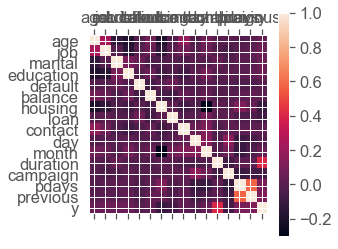

In [285]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

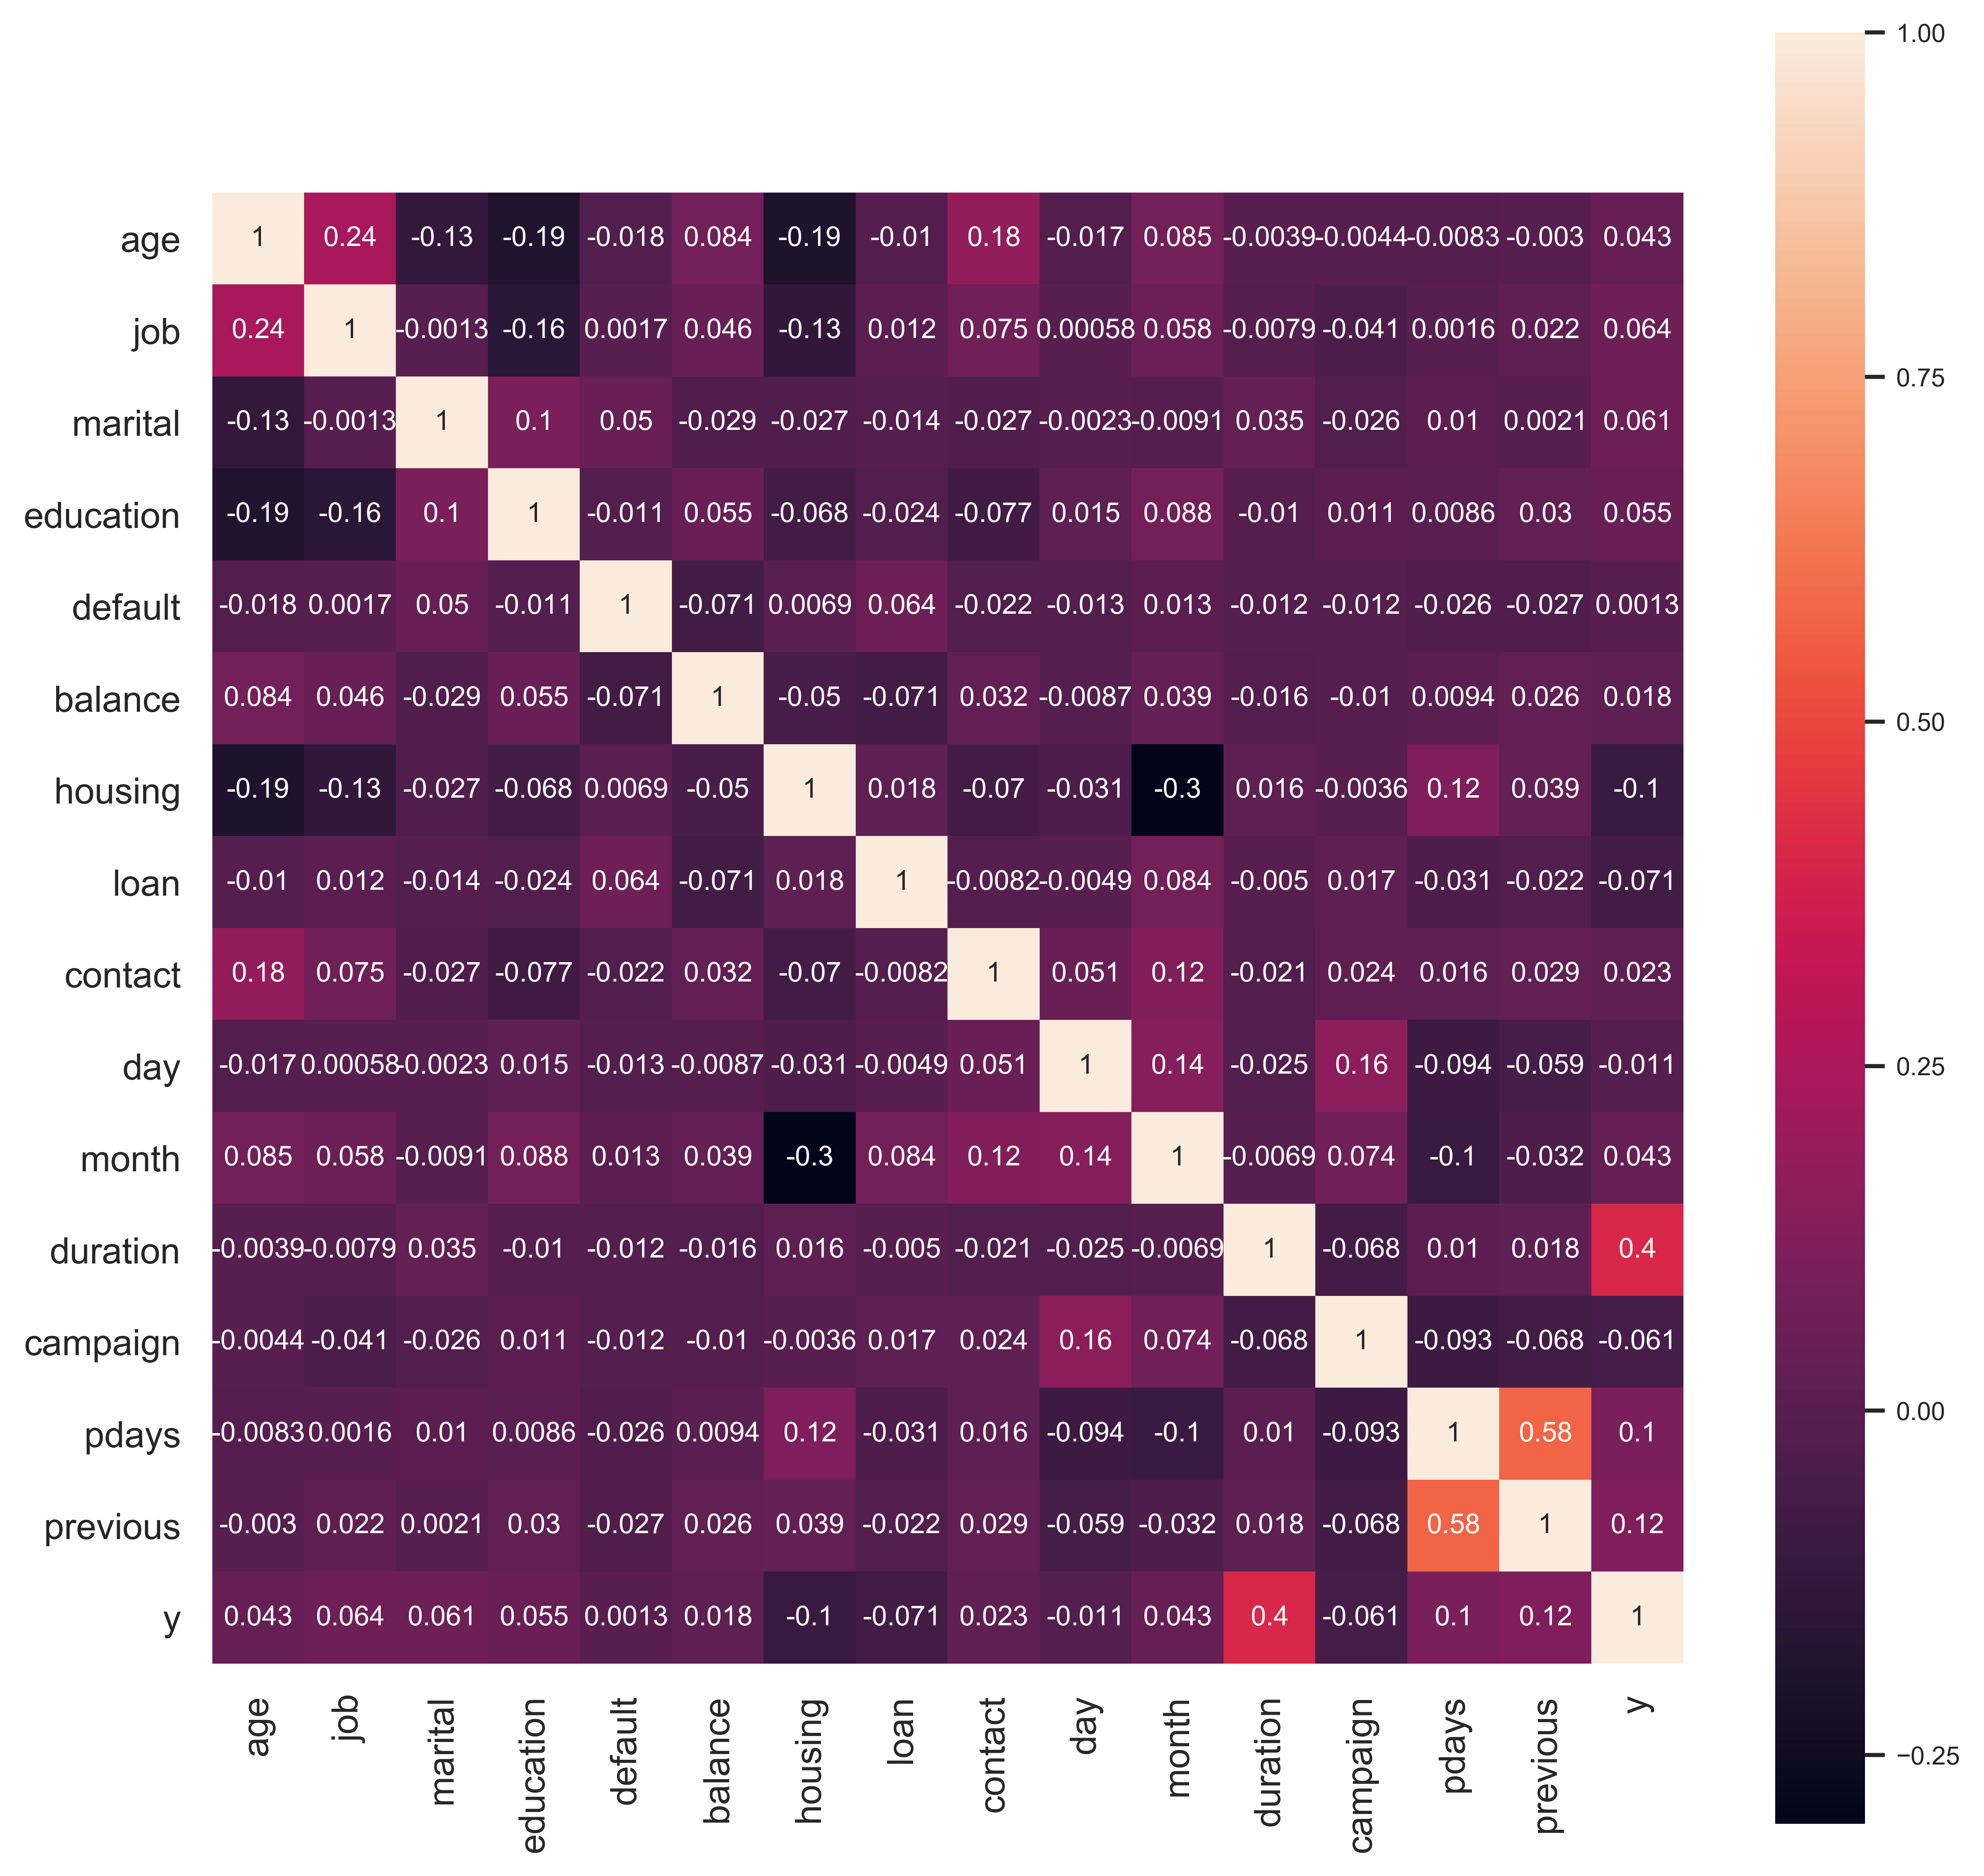

In [338]:
fig=plt.subplots(figsize=(10,10),dpi=600)
sn.set(font_scale=0.7)
sn.heatmap(df.corr(),square=True,cbar=True,annot=True)

# drop column poutcome 

In [306]:
df.drop('poutcome',1,inplace=True)


In [307]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30.0,management,married,primary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,no
4,27.0,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,no


In [308]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
age          4521 non-null float64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
y            4521 non-null object
dtypes: float64(1), int64(6), object(9)
memory usage: 565.2+ KB


# convert string values into numbers

In [309]:
def convert(col):
    ff= dict(zip(df[col].unique(), range(0,len(df[col].unique()))))
    df[col] = df[col].map(ff , df[col])


In [310]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,no
1,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,no
2,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,no
3,30.0,management,married,primary,no,1476,yes,yes,cellular,3,jun,199,4,-1,0,no
4,27.0,blue-collar,married,secondary,no,0,yes,no,cellular,5,may,226,1,-1,0,no


In [312]:
for x in ('job','marital','education','default','housing','loan','contact','month','y'):
    convert(x)
    

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
age          4521 non-null float64
job          4521 non-null int64
marital      4521 non-null int64
education    4521 non-null int64
default      4521 non-null int64
balance      4521 non-null int64
housing      4521 non-null int64
loan         4521 non-null int64
contact      4521 non-null int64
day          4521 non-null int64
month        4521 non-null int64
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
y            4521 non-null int64
dtypes: float64(1), int64(15)
memory usage: 565.2 KB


In [314]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

# splitting x(inputs) and y(outputs)

In [315]:
X=df.drop('y',1)
X=X.values

In [316]:
Y=df['y']
Y=Y.values

In [317]:
import sklearn
from sklearn.cross_validation import train_test_split

In [318]:
train_X,test_X,train_Y,test_Y = train_test_split(X, Y, test_size=0.73, random_state=42)

In [319]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix  

# Support Vector Machine

In [320]:
model = svm.SVC(kernel = "rbf")
model.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [321]:
pred_y = model.predict(test_X)
print(metrics.classification_report(test_Y, pred_y))
print(metrics.confusion_matrix(test_Y,pred_y))
print(accuracy_score(test_Y, pred_y))
svm_score=accuracy_score(test_Y, pred_y)

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2920
          1       0.00      0.00      0.00       381

avg / total       0.78      0.88      0.83      3301

[[2920    0]
 [ 381    0]]
0.884580430172675


C:\Users\Jigisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# K-Nearest Neighbors

In [322]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [323]:
pred_y = model.predict(test_X)
print(metrics.classification_report(test_Y, pred_y))
print(metrics.confusion_matrix(test_Y,pred_y))
print(accuracy_score(test_Y, pred_y))
knn_score=accuracy_score(test_Y, pred_y)

             precision    recall  f1-score   support

          0       0.90      0.98      0.93      2920
          1       0.44      0.14      0.21       381

avg / total       0.84      0.88      0.85      3301

[[2850   70]
 [ 327   54]]
0.8797334141169343


In [324]:
from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
k_range
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
grid.fit(train_X,train_Y)
grid.best_score_
knnf_score=grid.best_score_

In [325]:
grid.best_params_

{'n_neighbors': 15}

# Naive Bayes

In [326]:
model = GaussianNB()
model.fit(train_X,train_Y)

GaussianNB(priors=None)

In [327]:
pred_y = model.predict(test_X)
print(metrics.classification_report(test_Y, pred_y))
print(metrics.confusion_matrix(test_Y,pred_y))
print(accuracy_score(test_Y, pred_y))
nv_score=accuracy_score(test_Y, pred_y)

             precision    recall  f1-score   support

          0       0.92      0.89      0.90      2920
          1       0.34      0.44      0.38       381

avg / total       0.86      0.84      0.84      3301

[[2590  330]
 [ 214  167]]
0.8352014541048167


In [328]:
nv_score

0.8352014541048167

In [329]:
knnf_score

0.8918032786885246

In [330]:
svm_score

0.884580430172675

<BarContainer object of 3 artists>

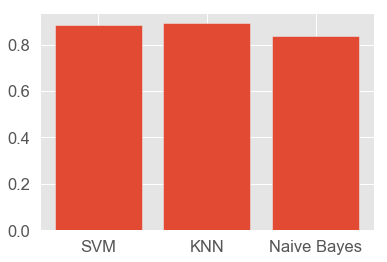

In [331]:
D = {u'SVM':svm_score, u'KNN': knnf_score, u'Naive Bayes':nv_score}

plt.bar(D.keys(), D.values(), align='center')